In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

Using TensorFlow backend.


In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
link = 'https://drive.google.com/open?id=1GrTxa7VIOzp-G27JRfNIGSrVP77b-hfE'

In [0]:
fluff, id = link.split('=')
print (id)

1GrTxa7VIOzp-G27JRfNIGSrVP77b-hfE


In [0]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('1497 input (1).csv')  
ip = pd.read_csv('1497 input (1).csv')

In [0]:
ip

,a,b,c,d,e,f
0,0.0,0.0,13.2,13.230,13.22,13.2
1,0.0,0.0,13.2,13.228,13.22,13.2
2,0.0,0.0,13.3,13.228,13.22,13.2
3,0.0,0.0,13.2,13.228,13.22,13.2
4,0.0,0.0,13.3,13.230,13.22,13.2
...,...,...,...,...,...,...
51151,0.0,0.0,13.2,13.169,13.23,13.2
51152,0.0,0.0,13.2,13.167,13.23,13.2
51153,0.0,0.0,13.2,13.170,13.24,13.2
51154,0.0,0.0,13.2,13.172,13.23,13.2


In [0]:
link = 'https://drive.google.com/open?id=1HVSrbcMi6AtrpOP-nzsCloneIAr--erR'

In [0]:
fluff, id1 = link.split('=')
print (id1)

1HVSrbcMi6AtrpOP-nzsCloneIAr--erR


In [0]:
downloaded = drive.CreateFile({'id':id1}) 
downloaded.GetContentFile('1497 output (1).csv')  
op = pd.read_csv('1497 output (1).csv')

In [0]:
op

,A,B,C,D,E,F,G
0,13.2,13.2,13.2,13.2,13.2,13.2,13.2
1,13.2,13.2,13.2,13.2,13.2,13.2,13.2
2,13.2,13.2,13.2,13.2,13.2,13.2,13.2
3,13.2,13.2,13.2,13.2,13.2,13.2,13.2
4,13.2,13.2,13.2,13.2,13.2,13.2,13.2
...,...,...,...,...,...,...,...
51151,13.2,13.2,13.2,13.5,13.2,13.2,13.5
51152,13.2,13.2,13.2,13.5,13.2,13.2,13.5
51153,13.2,13.2,13.2,13.5,13.3,13.2,13.5
51154,13.2,13.2,13.2,13.5,13.2,13.2,13.5


In [0]:
X=ip
y=op

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [0]:
target = y_train

In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(7, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               896       
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 7)                 1799      
Total params: 167,303
Trainable params: 167,303
Non-trainable params: 0
_________________________________________________________________


In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(X_train, target, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)




Train on 36832 samples, validate on 9208 samples
Epoch 1/100





36832/36832 [==============================] - 5s 128us/step - loss: 0.5133 - mean_absolute_error: 0.5133 - val_loss: 0.3468 - val_mean_absolute_error: 0.3468

Epoch 00001: val_loss improved from inf to 0.34677, saving model to Weights-001--0.34677.hdf5
Epoch 2/100
36832/36832 [==============================] - 4s 117us/step - loss: 0.3055 - mean_absolute_error: 0.3055 - val_loss: 0.3044 - val_mean_absolute_error: 0.3044

Epoch 00002: val_loss improved from 0.34677 to 0.30444, saving model to Weights-002--0.30444.hdf5
Epoch 3/100
36832/36832 [==============================] - 5s 124us/step - loss: 0.3109 - mean_absolute_error: 0.3109 - val_loss: 0.2859 - val_mean_absolute_error: 0.2859

Epoch 00003: val_loss improved from 0.30444 to 0.28591, saving model to Weights-003--0.28591.hdf5
Epoch 4/100
36832/36832 [==============================] - 4s 122us/step - loss: 0.2633 - mean_absolute_error: 0.2633 - val_loss: 0.2045 

In [0]:
pred=NN_model.predict(X_test)

In [0]:
pred

array([[10.639848 ,  9.946168 , 28.658365 , ..., 35.784973 , 19.00824  ,
        16.73679  ],
       [11.342086 , 10.022143 , 26.84973  , ..., 32.33746  , 17.475393 ,
        16.102146 ],
       [11.356694 , 10.029609 , 26.853182 , ..., 32.331196 , 17.4562   ,
        16.055002 ],
       ...,
       [13.2154455, 11.145505 , 14.236693 , ..., 14.335918 , 13.468097 ,
        14.270946 ],
       [12.985845 , 10.559386 , 15.629896 , ..., 15.990314 , 13.676923 ,
        13.726582 ],
       [13.200717 , 11.062308 , 14.261278 , ..., 14.331726 , 13.456173 ,
        13.945984 ]], dtype=float32)

In [0]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)
print(test_set_rmse)
print(test_set_r2)
print(test_set_mae)

0.24831982892633597
0.9458995446608641
0.11463440584894045


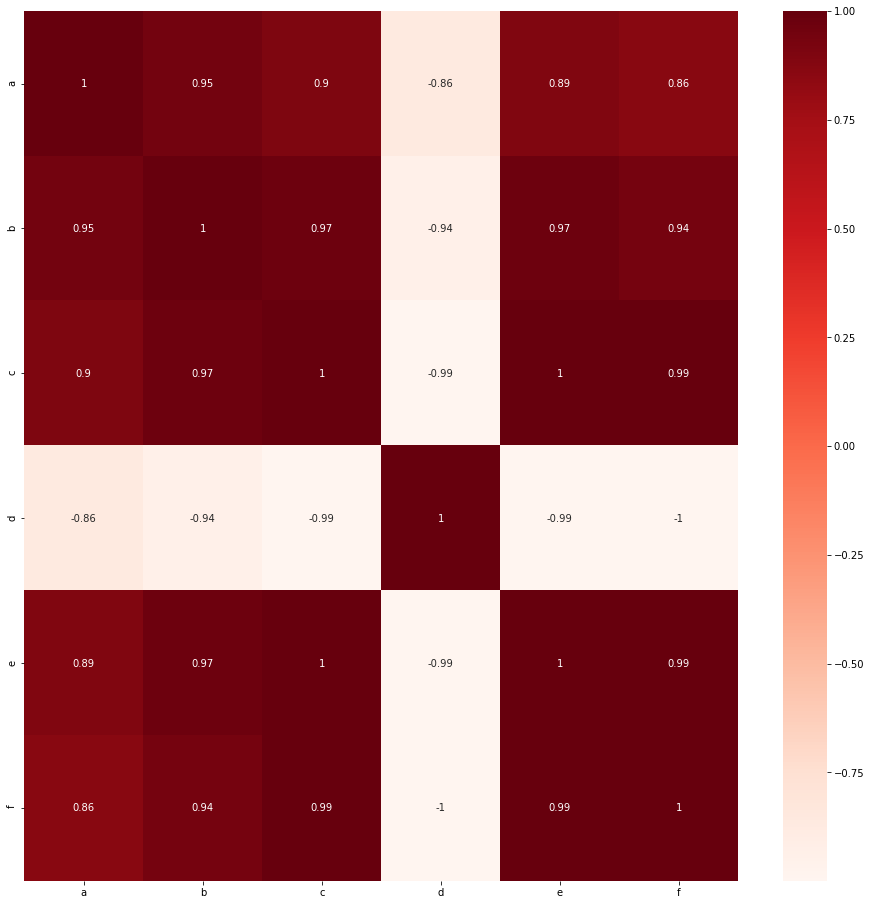

In [0]:
plt.figure(figsize=(16,16))
cor=ip.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [0]:
X=ip.drop('e',axis=1).drop('f',axis=1).drop('b',axis=1)
y=op

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [0]:
target = y_train

In [0]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(7, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               512       
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)              

In [0]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [0]:
NN_model.fit(X_train, target, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 36832 samples, validate on 9208 samples
Epoch 1/100
36832/36832 [==============================] - 10s 285us/step - loss: 0.8002 - mean_absolute_error: 0.8002 - val_loss: 0.3224 - val_mean_absolute_error: 0.3224

Epoch 00001: val_loss improved from inf to 0.32238, saving model to Weights-001--0.32238.hdf5
Epoch 2/100
36832/36832 [==============================] - 10s 266us/step - loss: 0.4447 - mean_absolute_error: 0.4447 - val_loss: 0.4650 - val_mean_absolute_error: 0.4650

Epoch 00002: val_loss did not improve from 0.32238
Epoch 3/100
36832/36832 [==============================] - 10s 263us/step - loss: 0.3976 - mean_absolute_error: 0.3976 - val_loss: 0.2398 - val_mean_absolute_error: 0.2398

Epoch 00003: val_loss improved from 0.32238 to 0.23984, saving model to Weights-003--0.23984.hdf5
Epoch 4/100
36832/36832 [==============================] - 10s 262us/step - loss: 0.3772 - mean_absolute_error: 0.3772 - val_loss: 0.2984 - val_mean_absolute_error: 0.2984

Epoch 00004: val

In [0]:
pred=NN_model.predict(X_test)

In [0]:
pred

array([[10.610032 ,  9.837533 , 28.80966  , ..., 35.888912 , 19.035055 ,
        16.627136 ],
       [11.354549 ,  9.969299 , 27.02533  , ..., 32.46337  , 17.528534 ,
        16.125225 ],
       [11.356525 ,  9.966889 , 26.99523  , ..., 32.414936 , 17.509474 ,
        16.107159 ],
       ...,
       [13.118292 , 11.00207  , 14.296998 , ..., 14.390333 , 13.407763 ,
        13.919399 ],
       [12.862041 , 10.459404 , 15.7579365, ..., 16.151762 , 13.610748 ,
        13.661892 ],
       [13.079841 , 10.962246 , 14.276012 , ..., 14.368324 , 13.373848 ,
        13.867189 ]], dtype=float32)

In [0]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)
print(test_set_rmse)
print(test_set_r2)
print(test_set_mae)

0.3544380041283471
0.8951126372354379
0.16823758192732421


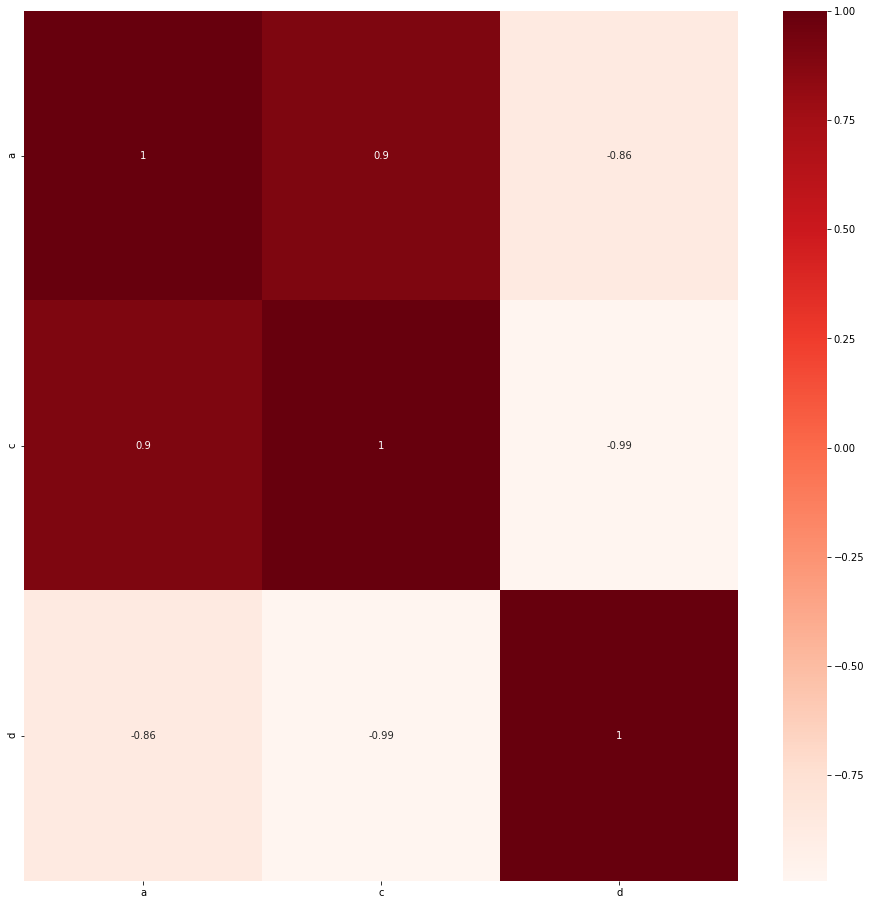

In [0]:
plt.figure(figsize=(16,16))
cor=X.corr()
sb.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

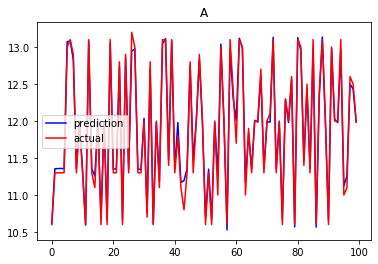

In [0]:
atest=y_test['A']
atest=atest.head(n=100)
apred=pred[:100:,0]
x=np.arange(0,100)
plt.title('A')
plt.plot(x,apred,'b-',label='prediction')
plt.plot(x,atest,'r-',label='actual')
plt.legend()
plt.show()

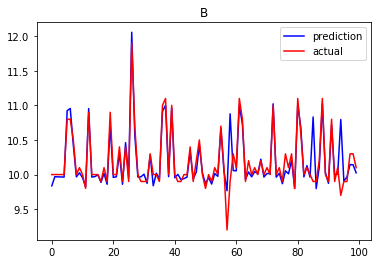

In [0]:
btest=y_test['B']
btest=btest.head(n=100)
bpred=pred[:100:,1]
x=np.arange(0,100)
plt.title('B')
plt.plot(x,bpred,'b-',label='prediction')
plt.plot(x,btest,'r-',label='actual')
plt.legend()
plt.show()

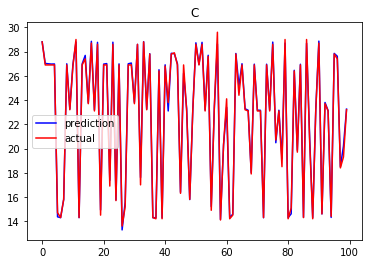

In [0]:
ctest=y_test['C']
ctest=ctest.head(n=100)
cpred=pred[:100:,2]
x=np.arange(0,100)
plt.title('C')
plt.plot(x,cpred,'b-',label='prediction')
plt.plot(x,ctest,'r-',label='actual')
plt.legend()
plt.show()

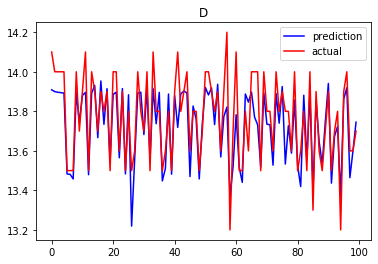

In [0]:
dtest=y_test['D']
dtest=dtest.head(n=100)
dpred=pred[:100:,3]
x=np.arange(0,100)
plt.title('D')
plt.plot(x,dpred,'b-',label='prediction')
plt.plot(x,dtest,'r-',label='actual')
plt.legend()
plt.show()

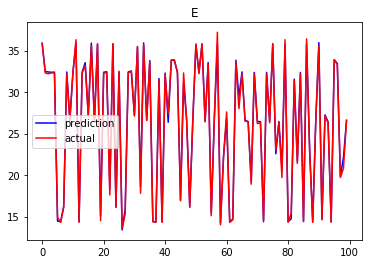

In [0]:
etest=y_test['E']
etest=etest.head(n=100)
epred=pred[:100:,4]
x=np.arange(0,100)
plt.title('E')
plt.plot(x,epred,'b-',label='prediction')
plt.plot(x,etest,'r-',label='actual')
plt.legend()
plt.show()

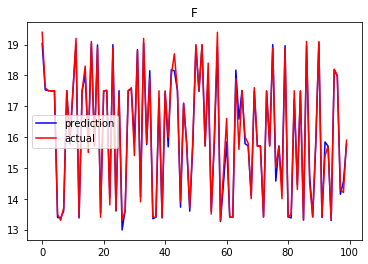

In [0]:
ftest=y_test['F']
ftest=ftest.head(n=100)
fpred=pred[:100:,5]
x=np.arange(0,100)
plt.title('F')
plt.plot(x,fpred,'b-',label='prediction')
plt.plot(x,ftest,'r-',label='actual')
plt.legend()
plt.show()

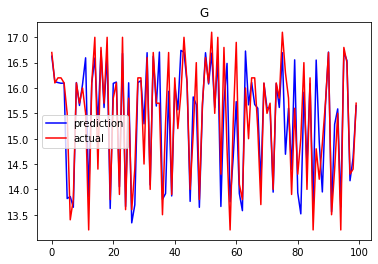

In [0]:
gtest=y_test['G']
gtest=gtest.head(n=100)
gpred=pred[:100:,6]
x=np.arange(0,100)
plt.title('G')
plt.plot(x,gpred,'b-',label='prediction')
plt.plot(x,gtest,'r-',label='actual')
plt.legend()
plt.show()